<a href="https://colab.research.google.com/github/Erfan-ram/Deep-ML-Doc/blob/main/Fit_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# imports
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/red-wine.csv')
# dataset.info()
X= dataset.copy().select_dtypes(exclude='int64')
y= dataset.copy().pop('quality')
print(X.shape)

(1599, 11)


we implement a layer with combine some units:

![Layer](https://storage.googleapis.com/kaggle-media/learn/images/Y5iwFQZ.png)

and you may asking what is **Activation function** and what it does ?

A rectified linear unit `(ReLU)` is an activation function that introduces the property of non-linearity to a deep learning model and `solves the vanishing gradients issue`. "It interprets the positive part of its argument. It is one of the most popular activation functions in deep learning.

![relu](https://storage.googleapis.com/kaggle-media/learn/images/OLSUEYT.png)

In [48]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Input((11,)),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=256, activation='relu'),
    # the linear output layer
    layers.Dense(units=1),
])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               6144      
                                                                 
 dense_31 (Dense)            (None, 256)               131328    
                                                                 
 dense_32 (Dense)            (None, 1)                 257       
                                                                 
Total params: 137,729
Trainable params: 137,729
Non-trainable params: 0
_________________________________________________________________


In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model2 = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=512 ,activation='relu' ,name='L1' ),
    layers.Dense(units=512 ,activation='relu' ,name='L2' ),
    layers.Dense(units=512 ,activation='relu' ,name='L3' ),
    layers.Dense(units=1 ,activation='linear' ,name='out' ),

])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 512)               1024      
                                                                 
 L2 (Dense)                  (None, 512)               262656    
                                                                 
 L3 (Dense)                  (None, 512)               262656    
                                                                 
 out (Dense)                 (None, 1)                 513       
                                                                 
Total params: 526,849
Trainable params: 526,849
Non-trainable params: 0
_________________________________________________________________


now we are gonna see how would out code compile and fit model :

![fit model](https://storage.googleapis.com/kaggle-media/learn/images/rFI1tIk.gif)

The `loss function` measures the disparity between the the target's true value and the value the model predicts.

batch size = x `inputs casses` would train on model on eatch iterations

epoch = itterations to decreas cost function ( J )

`all inputs / epochs` = batch size (samples would train on each itterations or epochs )

Learning Rate = according to the mount of it , it tooks longer or smaller step to learn from samples .

`Adam optimizer `is a way to boost Learning rate intuition .



#Add Loss and Optimizer

Before training the network we need to define the loss and optimizer we'll use. Using the model's compile method, add the Adam optimizer and MAE loss.

In [49]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss= keras.losses.MeanAbsoluteError(),
    )

# model.compile(optimizer='Adam',
      #  loss= 'mae')

#Train Model
Once you've defined the model and compiled it with a loss and optimizer you're ready for training. Train the network for 200 epochs with a batch size of 128. The input data is X with target y.

In [50]:
history = model.fit(
    x=X,
    y=y,
    batch_size=128,
    epochs=100
)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 2.7187
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.9665
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6836
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5864
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5550
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5627
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5501
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5907
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6657
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6015
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5818
Epoch 12/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6286
Epoch 13/100
13/13 [=================

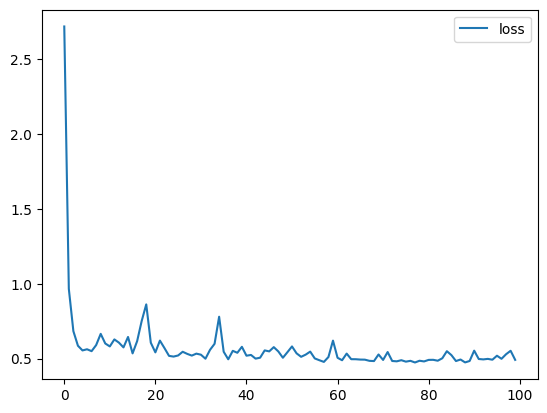

In [51]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[:, ['loss']].plot();